In [1]:
import pandas as pd
import numpy as np
import json
import csv

In [2]:
#1.确定这几个数据都是干什么的
swiping_card_dataframe = pd.read_csv('./bus_swiping_card_info1.csv')
card_info_dataframe = pd.read_csv('./card_info.csv')
bus_swip_dataframe = pd.read_excel('公交数据.xlsx',sheet_name='刷卡数据',header=0,engine='openpyxl')
bus_station_dataframe = pd.read_excel('公交数据.xlsx',sheet_name='站点数据',header=0,engine='openpyxl')
#swiping_card_dataframe ： 每次刷卡的信息：几号线，第几站，车辆的id，刷卡的id，刷卡的时间
#card_info_dataframe ： 每次刷卡的信息：几号线，第几站，车辆的id，刷卡的id，刷卡的时间也是上面的信息，但是时间是去年的。
#用去年的时间的同比数据，去预测今年的同比数据，看是否一致，如果一致，说明经济发展没有变化，如果变大，说明经济好转
#bus_swip_dataframe ：一天的统计信息：各条线路、各个站点的刷卡数量信息
#bus_station_dataframe ： 站点的统计信息：各个站点的经纬度

# 画每条线路有多少车站数的直方图

In [4]:
line_station_number_sequen_dataframe = \
bus_station_dataframe.groupby(['line_identity','station_number']).agg({'station_name':list,'station_identity':list}).reset_index()
line_station_number_sequen_dataframe['length'] = line_station_number_sequen_dataframe['station_identity'].apply(lambda x:len(x))
line_station_number_sequen_dataframe

,line_identity,station_number,station_name,station_identity,length
0,1,20,"[火车站, 展览馆, 新路口, 邮电大楼, 大十字, 喷水池, 云中广场, 六广门, 北京路...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",20
1,2,20,"[火车站, 展览馆, 新路口, 河滨公园, 次南门, 大西门, 紫林庵, 延安西路, 黔灵山...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",20
2,3,29,"[贵州理工学院, 贵黄交警支队, 枫丹白鹭花园, 后坝, 三桥水果市场, 三桥, 三桥北路口...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",29
3,4,44,"[新寨公交枢纽, 南厂路南, 军区干休所, 武岳新村, 军区二招, 南厂路北, 纪念塔, 箭...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",44
4,5,36,"[甘荫塘轨道站, 甘荫塘, 四方河路站, 通银配件城, 皂角井站, 凤凰翠堤, 新发装饰市场...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",36
...,...,...,...,...,...
320,10050,46,"[一八三厂, 毛寨村, 小河平桥, 黄河路南, 黄河路北, 四十四医院, 新村, 四方河, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",46
321,10056,31,"[乐湾国际城, 东风镇, 贵州师范学院, 云上村, 117地质队, 温泉路口, 新添寨, 市...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",31
322,10229,28,"[金阳客站, 商城东路, 宾阳大道, 兴筑西路, 碧海乾图, 黔中一中南, 老阳关, 北京路...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",28
323,10262,24,"[黔中北站, 甲秀北路, 杨家庄, 大关, 鹿冲关公园, 相宝山, 师大, 省公安厅, 宝山...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",24


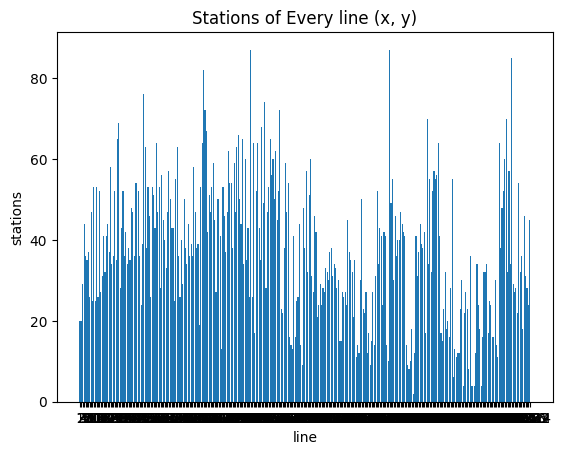

In [14]:
#画车站数量直方图
x=line_station_number_sequen_dataframe['line_identity'].values.tolist()
y=line_station_number_sequen_dataframe['length'].values.tolist()
import matplotlib.pyplot as plt
# 创建直方图
plt.bar(range(len(x)), y)
# 设置横轴刻度标签为自定义的类别名称
plt.xticks(range(len(x)), x)
# 添加标题和标签
plt.title('Stations of Every line (x, y)')
plt.xlabel('line')
plt.ylabel('stations')
# 保存图形为SVG格式
plt.savefig('./figures/stations_every_line_histogram.svg', format='svg')
# 显示图形
plt.show()

# 构造字典来方便按照线路和站点序号来索引站点

In [67]:
line_station_number_sequen_dataframe['id_station'] = \
line_station_number_sequen_dataframe.apply(lambda x:list(zip(x['station_identity'],x['station_name'])),axis=1)
line_station_number_sequen_dataframe
#构建一个字典：
#road_structure = {line_id:{'stations_nums':int,'stations':{station_id:station_name},'all_stations':[]}}
road_line_station_structure_setting={}
for row_index in range(len(line_station_number_sequen_dataframe)):
    line_id = line_station_number_sequen_dataframe[row_index:row_index+1]['line_identity'].values[0]
    stations_nums = line_station_number_sequen_dataframe[row_index:row_index+1]['station_number'].values[0]
    all_stations = line_station_number_sequen_dataframe[row_index:row_index+1]['station_name'].values[0]
    stations={}
    for instance in line_station_number_sequen_dataframe[row_index:row_index+1]['id_station'].values[0]:
        instance_id = instance[0]
        instance_name = instance[1]
        stations[instance_id]=instance_name
    road_line = {'stations_nums':stations_nums,'stations':stations,'all_stations':all_stations}
    road_line_station_structure_setting[line_id] = road_line    
road_line_station_structure_setting

{1: {'stations_nums': 20,
  'stations': {1: '火车站',
   2: '展览馆',
   3: '新路口',
   4: '邮电大楼',
   5: '大十字',
   6: '喷水池',
   7: '云中广场',
   8: '六广门',
   9: '北京路',
   10: '北京西路口',
   11: '黔灵山公园',
   12: '黔灵山公园',
   13: '延安西路',
   14: '紫林庵',
   15: '大西门',
   16: '次南门',
   17: '河滨公园',
   18: '新路口',
   19: '展览馆',
   20: '火车站'},
  'all_stations': ['火车站',
   '展览馆',
   '新路口',
   '邮电大楼',
   '大十字',
   '喷水池',
   '云中广场',
   '六广门',
   '北京路',
   '北京西路口',
   '黔灵山公园',
   '黔灵山公园',
   '延安西路',
   '紫林庵',
   '大西门',
   '次南门',
   '河滨公园',
   '新路口',
   '展览馆',
   '火车站']},
 2: {'stations_nums': 20,
  'stations': {1: '火车站',
   2: '展览馆',
   3: '新路口',
   4: '河滨公园',
   5: '次南门',
   6: '大西门',
   7: '紫林庵',
   8: '延安西路',
   9: '黔灵山公园',
   10: '黔灵山公园',
   11: '北京西路口',
   12: '北京路',
   13: '六广门',
   14: '云中广场',
   15: '喷水池',
   16: '大十字',
   17: '邮电大楼',
   18: '新路口',
   19: '展览馆',
   20: '火车站'},
  'all_stations': ['火车站',
   '展览馆',
   '新路口',
   '河滨公园',
   '次南门',
   '大西门',
   '紫林庵',
   '延安西路',
   '黔灵山公园',
   '黔灵山公园',
   '北京西路口'

In [68]:
with open('./datas/road_line_station_structure_setting.json','w') as f:
    json.dump(road_line_station_structure_setting,f)

TypeError: keys must be str, int, float, bool or None, not int64

In [29]:
station_distance_rank_index_list = np.loadtxt('./station_pair_distance_rank_index.csv',delimiter=',',dtype=int)
# 从文件中读取字典
with open('./id_2_station.json', 'r') as file:
    id_2_station = json.load(file)
# 将字典保存到文件中
with open('./station_2_id.json', 'r') as file:
    station_2_id = json.load(file)
#从card_info_dataframe中找出所有用户一天内的od对信息
card_info_dataframe['custom_day'] = card_info_dataframe['custom_time'].apply(lambda x:x.split(' ')[0])
card_info_dataframe['custom_precise_time'] = card_info_dataframe['custom_time'].apply(lambda x:x.split(' ')[1])
#sum(card_info_dataframe['partitionday']==card_info_dataframe['custom_day'])
#card_info_dataframe
card_info_dataframe.drop(labels=['custom_time','card_type','consume','data_src','data_load_time','partitionday'],axis=1,inplace=True)
card_info_dataframe
day_0929_dataframe = card_info_dataframe[card_info_dataframe['custom_day']=='2023-09-29']
day_0929_dataframe

,card_identity,line_identity,car_identity,station_identity,custom_day,custom_precise_time
0,0x1FDD5BE63E904A3230A0AE9AA0E40C61,28,7520,54,2023-09-29,08:59:40
1,0x1FFC5D30D96AE2C4524842A09AA67C44,84,5085,24,2023-09-29,11:08:22
2,0x65F9DAD54040FBE48972B10F3B6337DC,25,6718,4,2023-09-29,08:51:28
3,0x747A26B4727A9A3094A1881F29D01510,208,6655,1,2023-09-29,22:32:48
4,0x81A8FFB4112FDBA4782A4FB50E1C0EE0,204,4472,46,2023-09-29,19:50:37
...,...,...,...,...,...,...
377159,0x51A33F38105E35D006C03F0694252007,52,5054,22,2023-09-29,08:48:38
377160,0x5BD2D7FBE1BE24A24AFD4D3ECA27FD3F,1,4662,6,2023-09-29,10:33:45
377161,0x6D191CC173F9415C1148B434D2F9012E,203,4810,5,2023-09-29,14:57:10
377162,0x7896A07D162530E734F876D16301EFEB,73,5176,23,2023-09-29,15:08:49


In [30]:
#按照刷卡id进行聚合
every_user_all_trips_dataframe = \
day_0929_dataframe.groupby('card_identity').agg({'custom_precise_time':list, \
                                                 'line_identity':list, \
                                                 'station_identity':list, \
                                                'car_identity':list},axis=1).reset_index()
#每天承载18万人出行181190人
#乘坐两程以上的有109927人
#乘坐单程的极有可能是流动，也有可能是别的交通方式回。从前后相依有下一段旅程的来确定od对，对于没有后程的暂时不确定。
every_user_all_trips_dataframe['trip_length'] = every_user_all_trips_dataframe['line_identity'].apply(lambda x:len(x))
#every_user_all_trips_dataframe
trip_great_than_2=every_user_all_trips_dataframe[every_user_all_trips_dataframe['trip_length']!=1].reset_index(drop=True)
#trip_great_than_2
trip_great_than_2['trip'] = trip_great_than_2.apply(lambda x:list(zip(x['custom_precise_time'],x['line_identity'],x['station_identity'])),axis=1)
trip_great_than_2#只有trip大于2的才可以分析他们在最后一程之前的目的地是在哪里，或者说，最后一趟车的上车点是在哪里。
#也就是说只有109927个人的每一程的起点和终点是可以追溯的，
#八万人起点不可追溯。

,card_identity,custom_precise_time,line_identity,station_identity,car_identity,trip_length,trip
0,0x0000719AE3ECECBABAD0263AF940450F,"[19:01:59, 16:55:43]","[40, 46]","[31, 1]","[4483, 3762]",2,"[(19:01:59, 40, 31), (16:55:43, 46, 1)]"
1,0x0000D15C7814D19BE81C40B3ED9CA55C,"[09:26:05, 19:24:18, 16:29:50, 09:20:51]","[207, 202, 5, 204]","[14, 39, 5, 8]","[7111, 4622, 4786, 4400]",4,"[(09:26:05, 207, 14), (19:24:18, 202, 39), (16..."
2,0x000229AC214F69A81F266A521394C628,"[07:13:30, 18:07:56]","[7, 19]","[21, 23]","[5020, 5038]",2,"[(07:13:30, 7, 21), (18:07:56, 19, 23)]"
3,0x00065B8345E25E499BDF9B0632576C87,"[16:26:36, 09:58:48]","[57, 57]","[6, 32]","[7344, 7343]",2,"[(16:26:36, 57, 6), (09:58:48, 57, 32)]"
4,0x00067C25B50FB204998F9955D5692DCD,"[13:42:06, 11:24:18]","[16, 306]","[22, 14]","[4536, 5181]",2,"[(13:42:06, 16, 22), (11:24:18, 306, 14)]"
...,...,...,...,...,...,...,...
109922,0xFFFD09DB2DE6FD874710FA9B56E9A1B4,"[09:42:40, 08:03:14]","[8, 319]","[22, 15]","[4875, 4440]",2,"[(09:42:40, 8, 22), (08:03:14, 319, 15)]"
109923,0xFFFD5320ADB5DC148D136F1494654247,"[12:46:31, 12:16:55]","[35, 9]","[8, 2]","[4881, 3882]",2,"[(12:46:31, 35, 8), (12:16:55, 9, 2)]"
109924,0xFFFDE3BEFCD5F71FFAC2FE888410D3BC,"[16:00:55, 16:01:00, 15:07:13, 15:07:03]","[12, 12, 229, 229]","[14, 14, 34, 34]","[7303, 7303, 7151, 7151]",4,"[(16:00:55, 12, 14), (16:01:00, 12, 14), (15:0..."
109925,0xFFFDF917CDD67471BC901AD187061D38,"[14:03:34, 13:16:22]","[47, 60]","[2, 6]","[5042, 4484]",2,"[(14:03:34, 47, 2), (13:16:22, 60, 6)]"


In [31]:
#可以统计一下旅行长度的人次分布。18万人中有多少是只做一次，有多少人是做两次。
trips_people_nums = every_user_all_trips_dataframe.groupby('trip_length').agg({'card_identity':list}).reset_index()
trips_people_nums['nums']=trips_people_nums['card_identity'].apply(lambda x:len(x))
trips_people_nums

,trip_length,card_identity,nums
0,1,"[0x0000163558B8AB77BFF797FEEEE10F01, 0x0000231...",71263
1,2,"[0x0000719AE3ECECBABAD0263AF940450F, 0x000229A...",66045
2,3,"[0x0006992CB60A1FE3F5785FBB64521954, 0x00092D8...",19886
3,4,"[0x0000D15C7814D19BE81C40B3ED9CA55C, 0x00157D9...",15264
4,5,"[0x001CC51820F900F9677BE2BA9966ECB4, 0x001FDC6...",4063
5,6,"[0x0024D8572B561E696B07CE25D86B5A65, 0x0030F66...",2533
6,7,"[0x00081108297CD51E14B712F8E236A09C, 0x003B9BF...",883
7,8,"[0x005FB08BE053E69D2F6E7CFC34F36B9D, 0x010EC37...",667
8,9,"[0x00430FF699F80FF99B30CD7C73FB75AF, 0x00B61E5...",268
9,10,"[0x021A91F862C844A6AAA2E2D2802898E9, 0x035AE6D...",143


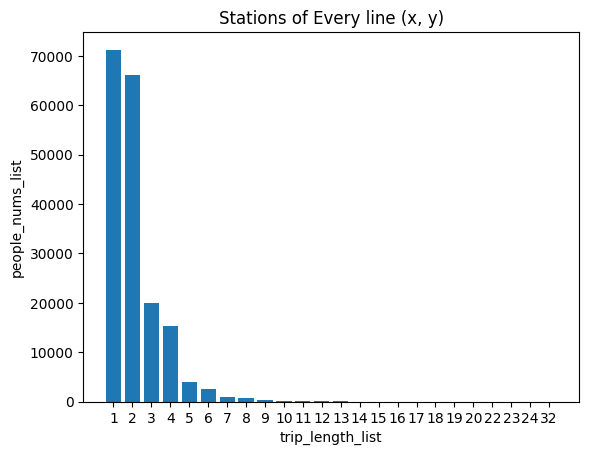

In [33]:
trip_length_list = trips_people_nums['trip_length'].values.tolist()
people_nums_list = trips_people_nums['nums'].values.tolist()
# 创建直方图
plt.bar(range(len(trip_length_list)), people_nums_list)
# 设置横轴刻度标签为自定义的类别名称
plt.xticks(range(len(trip_length_list)),trip_length_list)
# 添加标题和标签
plt.title('Stations of Every line (x, y)')
plt.xlabel('trip_length_list')
plt.ylabel('people_nums_list')
# 保存图形为SVG格式
plt.savefig('./figures/trips_people_histogram.svg', format='svg')
# 显示图形
plt.show()
#一天之内乘坐公交车的次数分布如下所示：

# 找到倒数第二站的乘客分布情况，需要归位，也就可以看成一个调度问题

In [37]:
def return_last_two_trip(x):
    sorted_x = sorted(x,key=lambda x:x[0],reverse=False)
    return sorted_x[-2:]
trip_great_than_2['trip_last_two']=trip_great_than_2['trip'].apply(lambda x:return_last_two_trip(x))
trip_great_than_2

,card_identity,custom_precise_time,line_identity,station_identity,car_identity,trip_length,trip,trip_last_two
0,0x0000719AE3ECECBABAD0263AF940450F,"[19:01:59, 16:55:43]","[40, 46]","[31, 1]","[4483, 3762]",2,"[(19:01:59, 40, 31), (16:55:43, 46, 1)]","[(16:55:43, 46, 1), (19:01:59, 40, 31)]"
1,0x0000D15C7814D19BE81C40B3ED9CA55C,"[09:26:05, 19:24:18, 16:29:50, 09:20:51]","[207, 202, 5, 204]","[14, 39, 5, 8]","[7111, 4622, 4786, 4400]",4,"[(09:26:05, 207, 14), (19:24:18, 202, 39), (16...","[(16:29:50, 5, 5), (19:24:18, 202, 39)]"
2,0x000229AC214F69A81F266A521394C628,"[07:13:30, 18:07:56]","[7, 19]","[21, 23]","[5020, 5038]",2,"[(07:13:30, 7, 21), (18:07:56, 19, 23)]","[(07:13:30, 7, 21), (18:07:56, 19, 23)]"
3,0x00065B8345E25E499BDF9B0632576C87,"[16:26:36, 09:58:48]","[57, 57]","[6, 32]","[7344, 7343]",2,"[(16:26:36, 57, 6), (09:58:48, 57, 32)]","[(09:58:48, 57, 32), (16:26:36, 57, 6)]"
4,0x00067C25B50FB204998F9955D5692DCD,"[13:42:06, 11:24:18]","[16, 306]","[22, 14]","[4536, 5181]",2,"[(13:42:06, 16, 22), (11:24:18, 306, 14)]","[(11:24:18, 306, 14), (13:42:06, 16, 22)]"
...,...,...,...,...,...,...,...,...
109922,0xFFFD09DB2DE6FD874710FA9B56E9A1B4,"[09:42:40, 08:03:14]","[8, 319]","[22, 15]","[4875, 4440]",2,"[(09:42:40, 8, 22), (08:03:14, 319, 15)]","[(08:03:14, 319, 15), (09:42:40, 8, 22)]"
109923,0xFFFD5320ADB5DC148D136F1494654247,"[12:46:31, 12:16:55]","[35, 9]","[8, 2]","[4881, 3882]",2,"[(12:46:31, 35, 8), (12:16:55, 9, 2)]","[(12:16:55, 9, 2), (12:46:31, 35, 8)]"
109924,0xFFFDE3BEFCD5F71FFAC2FE888410D3BC,"[16:00:55, 16:01:00, 15:07:13, 15:07:03]","[12, 12, 229, 229]","[14, 14, 34, 34]","[7303, 7303, 7151, 7151]",4,"[(16:00:55, 12, 14), (16:01:00, 12, 14), (15:0...","[(16:00:55, 12, 14), (16:01:00, 12, 14)]"
109925,0xFFFDF917CDD67471BC901AD187061D38,"[14:03:34, 13:16:22]","[47, 60]","[2, 6]","[5042, 4484]",2,"[(14:03:34, 47, 2), (13:16:22, 60, 6)]","[(13:16:22, 60, 6), (14:03:34, 47, 2)]"


In [38]:
def find_leave_station(sorted_index_array:np.ndarray,specified_indices:list):
    # 找到指定索引组中在排序数组中的位置
    positions = [sorted_index_array.index(idx) for idx in specified_indices]
    return sorted_index_array[min(positions)]
def process_last_two(x):
    this_time,this_line,this_station_id = x[0]
    next_time,next_line,next_station_id = x[1]
    try:
        this_line_station_name = road_line_station_structure_setting[this_line]['stations'][this_station_id]
        this_line_station_id = station_2_id[this_line_station_name]
        
        all_possible_leave_stations = road_line_station_structure_setting[this_line]['all_stations']
        all_possible_leave_stations_index = [station_2_id[station] for station in all_possible_leave_stations]
        
        next_line_station_name = road_line_station_structure_setting[next_line]['stations'][next_station_id]
        next_line_station_id = station_2_id[next_line_station_name]
        distance_2_next_line_station_ndarray  = station_distance_rank_index_list[next_line_station_id]
        leave_station = find_leave_station(distance_2_next_line_station_ndarray.tolist(),all_possible_leave_stations_index)
        return leave_station
    except:
        return -1
trip_great_than_2['last_des']=trip_great_than_2['trip_last_two'].apply(lambda x:process_last_two(x))
trip_great_than_2

,card_identity,custom_precise_time,line_identity,station_identity,car_identity,trip_length,trip,trip_last_two,last_des
0,0x0000719AE3ECECBABAD0263AF940450F,"[19:01:59, 16:55:43]","[40, 46]","[31, 1]","[4483, 3762]",2,"[(19:01:59, 40, 31), (16:55:43, 46, 1)]","[(16:55:43, 46, 1), (19:01:59, 40, 31)]",1262
1,0x0000D15C7814D19BE81C40B3ED9CA55C,"[09:26:05, 19:24:18, 16:29:50, 09:20:51]","[207, 202, 5, 204]","[14, 39, 5, 8]","[7111, 4622, 4786, 4400]",4,"[(09:26:05, 207, 14), (19:24:18, 202, 39), (16...","[(16:29:50, 5, 5), (19:24:18, 202, 39)]",406
2,0x000229AC214F69A81F266A521394C628,"[07:13:30, 18:07:56]","[7, 19]","[21, 23]","[5020, 5038]",2,"[(07:13:30, 7, 21), (18:07:56, 19, 23)]","[(07:13:30, 7, 21), (18:07:56, 19, 23)]",1417
3,0x00065B8345E25E499BDF9B0632576C87,"[16:26:36, 09:58:48]","[57, 57]","[6, 32]","[7344, 7343]",2,"[(16:26:36, 57, 6), (09:58:48, 57, 32)]","[(09:58:48, 57, 32), (16:26:36, 57, 6)]",424
4,0x00067C25B50FB204998F9955D5692DCD,"[13:42:06, 11:24:18]","[16, 306]","[22, 14]","[4536, 5181]",2,"[(13:42:06, 16, 22), (11:24:18, 306, 14)]","[(11:24:18, 306, 14), (13:42:06, 16, 22)]",983
...,...,...,...,...,...,...,...,...,...
109922,0xFFFD09DB2DE6FD874710FA9B56E9A1B4,"[09:42:40, 08:03:14]","[8, 319]","[22, 15]","[4875, 4440]",2,"[(09:42:40, 8, 22), (08:03:14, 319, 15)]","[(08:03:14, 319, 15), (09:42:40, 8, 22)]",1011
109923,0xFFFD5320ADB5DC148D136F1494654247,"[12:46:31, 12:16:55]","[35, 9]","[8, 2]","[4881, 3882]",2,"[(12:46:31, 35, 8), (12:16:55, 9, 2)]","[(12:16:55, 9, 2), (12:46:31, 35, 8)]",1314
109924,0xFFFDE3BEFCD5F71FFAC2FE888410D3BC,"[16:00:55, 16:01:00, 15:07:13, 15:07:03]","[12, 12, 229, 229]","[14, 14, 34, 34]","[7303, 7303, 7151, 7151]",4,"[(16:00:55, 12, 14), (16:01:00, 12, 14), (15:0...","[(16:00:55, 12, 14), (16:01:00, 12, 14)]",263
109925,0xFFFDF917CDD67471BC901AD187061D38,"[14:03:34, 13:16:22]","[47, 60]","[2, 6]","[5042, 4484]",2,"[(14:03:34, 47, 2), (13:16:22, 60, 6)]","[(13:16:22, 60, 6), (14:03:34, 47, 2)]",806


In [42]:
#109927个人在倒数第二个站的分布是什么样子的，可追溯的od对所确定的形程如下所示：
last_trip_peoples_distribution = trip_great_than_2.groupby('last_des').agg({'card_identity':list}).reset_index()
last_trip_peoples_distribution
last_trip_peoples_distribution['nums']=last_trip_peoples_distribution['card_identity'].apply(lambda x:len(x))
last_trip_peoples_distribution
last_station_people_nums_list = list(zip(last_trip_peoples_distribution['last_des'],last_trip_peoples_distribution['nums']))
sorted_last_station_people_nums_list = \
sorted(last_station_people_nums_list,key=lambda x:x[1],reverse=True)
sorted_last_station_people_nums_list

[(-1, 15679),
 (261, 3067),
 (1414, 1913),
 (349, 1664),
 (404, 1617),
 (263, 1611),
 (759, 1469),
 (1067, 1467),
 (406, 1324),
 (767, 1224),
 (633, 1168),
 (806, 1150),
 (387, 1141),
 (1208, 1041),
 (795, 1034),
 (1268, 1031),
 (987, 1024),
 (534, 1023),
 (1011, 976),
 (711, 971),
 (1155, 956),
 (1173, 948),
 (983, 891),
 (184, 881),
 (1120, 799),
 (87, 786),
 (555, 784),
 (758, 754),
 (1052, 746),
 (28, 727),
 (424, 712),
 (447, 678),
 (216, 648),
 (430, 639),
 (1314, 626),
 (610, 607),
 (913, 592),
 (122, 586),
 (1358, 557),
 (850, 502),
 (744, 499),
 (1062, 490),
 (807, 478),
 (508, 477),
 (1257, 476),
 (908, 474),
 (1161, 436),
 (1063, 428),
 (760, 407),
 (516, 406),
 (405, 397),
 (761, 388),
 (389, 384),
 (846, 379),
 (431, 377),
 (866, 370),
 (1056, 366),
 (403, 360),
 (1108, 349),
 (1061, 341),
 (128, 337),
 (1196, 333),
 (354, 331),
 (31, 327),
 (553, 327),
 (768, 326),
 (746, 325),
 (917, 325),
 (88, 322),
 (787, 319),
 (471, 312),
 (1392, 309),
 (1009, 307),
 (1292, 301),
 (

In [50]:
last_station_people_distribution = \
[(id_2_station[str(ins[0])],ins[1])for ins in sorted_last_station_people_nums_list[1:]]
with open("./datas/last_station_people_distribution.json", "w") as f:
  json.dump(last_station_people_distribution, f)
last_station_people_distribution

[('北京西路口', 3067),
 ('黔灵山公园', 1913),
 ('喷水池', 1664),
 ('大营坡', 1617),
 ('北京路', 1611),
 ('油榨街', 1469),
 ('花香村', 1467),
 ('大西门', 1324),
 ('浣沙桥', 1224),
 ('新路口', 1168),
 ('火车站', 1150),
 ('大十字', 1141),
 ('邮电大楼', 1041),
 ('湘雅村', 1034),
 ('钻石广场', 1031),
 ('紫林庵', 1024),
 ('师大', 1023),
 ('纪念塔', 976),
 ('次南门', 971),
 ('贵州医科大学', 956),
 ('贵开路', 948),
 ('箭道街路口', 891),
 ('体育馆', 881),
 ('西坝大道北段', 799),
 ('中山东路', 786),
 ('延安西路', 784),
 ('河滨公园', 754),
 ('花果园', 746),
 ('三桥', 727),
 ('头桥', 712),
 ('宝山北路口', 678),
 ('六广门', 648),
 ('威清路', 639),
 ('陈家坡', 626),
 ('新发装饰市场', 607),
 ('省公安厅', 592),
 ('二桥', 586),
 ('鹿冲关路', 557),
 ('甘荫塘', 502),
 ('沙冲中路', 499),
 ('花果园购物中心', 490),
 ('火车站批发市场', 478),
 ('展览馆', 477),
 ('金阳客站', 476),
 ('相宝山', 474),
 ('贵州日报社', 436),
 ('花果园金融街', 428),
 ('油榨街口', 407),
 ('市一医', 406),
 ('大营路', 397),
 ('洛平公交枢纽', 388),
 ('大南门', 384),
 ('瑞北路口', 379),
 ('威清路口', 377),
 ('甲秀楼', 370),
 ('花果园双子塔', 366),
 ('大理石路口', 360),
 ('蟠桃宫', 349),
 ('花果园湿地公园', 341),
 ('云中广场', 337),
 ('转弯塘', 333),
 ('四方河', 331),
 (

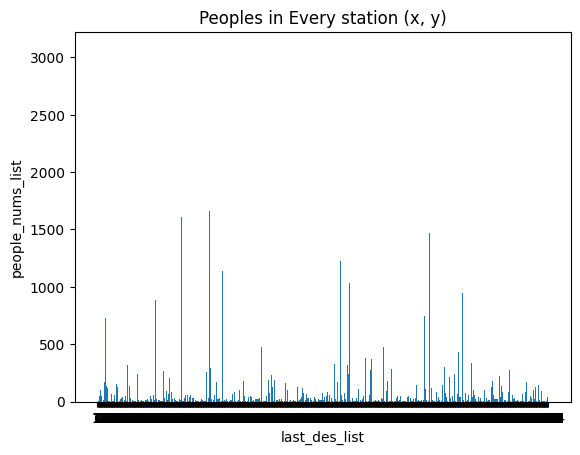

In [41]:
last_des_list = last_trip_peoples_distribution['last_des'].values.tolist()[1:]
people_nums_list = last_trip_peoples_distribution['nums'].values.tolist()[1:]
# 创建直方图
plt.bar(range(len(last_des_list)), people_nums_list)
# 设置横轴刻度标签为自定义的类别名称
plt.xticks(range(len(last_des_list)),last_des_list)
# 添加标题和标签
plt.title('Peoples in Every station (x, y)')
plt.xlabel('last_des_list')
plt.ylabel('people_nums_list')
# 保存图形为SVG格式
plt.savefig('./figures/people_in_every_station_histogram.svg', format='svg')
# 显示图形
plt.show()
#一天之内乘坐公交车的次数分布如下所示：

In [51]:
#这就变成了一个资源调配问题，怎么样才能让各个站点的流出等于流入，让整个交通系统能够循环往复。
last_station_people_nums_list#倒数第一站的驻留信息
#画出地图来，发现图中这些驻留多的站点，位于哪些线路上。
#各个站点的出发信息

[(-1, 15679),
 (0, 1),
 (1, 5),
 (2, 94),
 (4, 7),
 (7, 108),
 (8, 49),
 (10, 1),
 (12, 1),
 (14, 104),
 (15, 15),
 (16, 48),
 (17, 59),
 (18, 12),
 (19, 15),
 (20, 2),
 (21, 12),
 (22, 14),
 (23, 167),
 (24, 170),
 (25, 34),
 (28, 727),
 (29, 9),
 (30, 133),
 (31, 327),
 (32, 120),
 (33, 156),
 (35, 83),
 (36, 1),
 (38, 5),
 (39, 3),
 (40, 18),
 (41, 9),
 (42, 4),
 (43, 3),
 (44, 68),
 (45, 8),
 (46, 4),
 (48, 10),
 (49, 26),
 (50, 6),
 (52, 2),
 (53, 59),
 (54, 4),
 (55, 2),
 (56, 4),
 (58, 3),
 (59, 154),
 (60, 132),
 (61, 131),
 (62, 24),
 (63, 3),
 (65, 13),
 (66, 35),
 (68, 8),
 (69, 129),
 (70, 19),
 (71, 9),
 (72, 35),
 (73, 35),
 (74, 5),
 (75, 44),
 (76, 12),
 (78, 13),
 (79, 57),
 (80, 63),
 (81, 11),
 (82, 18),
 (83, 46),
 (84, 172),
 (85, 27),
 (86, 6),
 (87, 786),
 (88, 322),
 (90, 143),
 (91, 14),
 (92, 58),
 (93, 32),
 (94, 136),
 (95, 4),
 (96, 32),
 (98, 1),
 (99, 9),
 (100, 7),
 (102, 1),
 (103, 10),
 (105, 83),
 (108, 3),
 (109, 15),
 (110, 12),
 (112, 2),
 (113, 89

# 找到起点站的人数分布

In [58]:
def process_start_station(x):
    return list(zip(x['custom_precise_time'],x['line_identity'],x['station_identity']))
every_user_all_trips_dataframe['trips']=\
every_user_all_trips_dataframe.apply(lambda x:process_start_station(x),axis=1)
every_user_all_trips_dataframe
def sort_x(x):
    sorted_x =sorted(x,key=lambda x:x[0],reverse=False)
    return sorted_x[0]
every_user_all_trips_dataframe['start_trip']=\
every_user_all_trips_dataframe['trips'].apply(lambda x:sort_x(x))
every_user_all_trips_dataframe
def get_start_station_id(x):
    time,line,sequen = x
    try:
        this_line_station_name = road_line_station_structure_setting[line]['stations'][sequen]
        this_line_station_id = station_2_id[this_line_station_name]
    except:
        this_line_station_id = -1
    return this_line_station_id
every_user_all_trips_dataframe['start_station']=\
every_user_all_trips_dataframe['start_trip'].apply(lambda x:get_start_station_id(x))
every_user_all_trips_dataframe
start_station_peoples = every_user_all_trips_dataframe.groupby('start_station').agg({'card_identity':list}).reset_index()
start_station_peoples['nums'] = start_station_peoples['card_identity'].apply(lambda x:len(x))
start_station_peoples

,start_station,card_identity,nums
0,-1,"[0x0001B78FFD2E28F4FDEA2777DFBBED6E, 0x0005905...",21424
1,0,"[0x230C5E101AB998F843ED24E7FC16CF58, 0x305D762...",20
2,1,"[0x097A2F378B7BC6492CC286521A03BF8E, 0x0D17458...",39
3,2,"[0x01C42F949F33C63B1A56442D3C2CA35B, 0x01DE185...",250
4,4,"[0x0B5481E6F1BA7C7242D5754CB20056D0, 0x0C29012...",15
...,...,...,...
1139,1442,"[0x0F91DC12D8E07B7B01932037D4F621E9, 0x1BA3870...",4
1140,1443,"[0x0028C61AAAE132EE543677487C7E665E, 0x002AE6D...",116
1141,1445,[0x378F9C643C24769227FC802C512E867C],1
1142,1447,[0xD03D0A8709A7611B953EB560D4013BF3],1


In [61]:
start_station_people_nums_list = list(zip(start_station_peoples['start_station'],start_station_peoples['nums']))
sorted_start_station_people_nums_list = \
sorted(start_station_people_nums_list,key=lambda x:x[1],reverse=True)
sorted_start_station_people_nums_list

[(-1, 21424),
 (261, 1865),
 (759, 1684),
 (404, 1616),
 (349, 1476),
 (406, 1418),
 (1414, 1322),
 (806, 1213),
 (553, 1166),
 (795, 1125),
 (122, 1056),
 (1409, 1018),
 (1067, 1017),
 (28, 968),
 (1011, 948),
 (610, 946),
 (1257, 941),
 (387, 922),
 (1173, 905),
 (1052, 896),
 (263, 895),
 (761, 895),
 (1120, 819),
 (987, 817),
 (447, 814),
 (419, 808),
 (1314, 798),
 (850, 790),
 (534, 781),
 (550, 781),
 (767, 771),
 (1358, 771),
 (711, 760),
 (633, 757),
 (1155, 746),
 (508, 742),
 (88, 712),
 (1207, 706),
 (87, 695),
 (189, 690),
 (1063, 683),
 (354, 668),
 (1208, 643),
 (1392, 641),
 (398, 639),
 (983, 637),
 (424, 635),
 (405, 634),
 (682, 634),
 (31, 628),
 (787, 625),
 (1163, 624),
 (60, 618),
 (913, 618),
 (1018, 618),
 (184, 616),
 (216, 602),
 (403, 602),
 (744, 599),
 (207, 598),
 (833, 598),
 (1140, 589),
 (908, 586),
 (320, 581),
 (341, 574),
 (235, 569),
 (852, 568),
 (1056, 550),
 (215, 543),
 (555, 543),
 (128, 536),
 (898, 531),
 (1009, 531),
 (599, 526),
 (1061, 51

In [62]:
start_station_people_distribution = \
[(id_2_station[str(ins[0])],ins[1]) for ins in sorted_start_station_people_nums_list[1:]]
with open("./datas/start_station_people_distribution.json", "w") as f:
  json.dump(start_station_people_distribution, f)
start_station_people_distribution

[('北京西路口', 1865),
 ('油榨街', 1684),
 ('大营坡', 1616),
 ('喷水池', 1476),
 ('大西门', 1418),
 ('黔灵山公园', 1322),
 ('火车站', 1213),
 ('延安南路口', 1166),
 ('湘雅村', 1125),
 ('二桥', 1056),
 ('黔春立交', 1018),
 ('花香村', 1017),
 ('三桥', 968),
 ('纪念塔', 948),
 ('新发装饰市场', 946),
 ('金阳客站', 941),
 ('大十字', 922),
 ('贵开路', 905),
 ('花果园', 896),
 ('北京路', 895),
 ('洛平公交枢纽', 895),
 ('西坝大道北段', 819),
 ('紫林庵', 817),
 ('宝山北路口', 814),
 ('太慈桥', 808),
 ('陈家坡', 798),
 ('甘荫塘', 790),
 ('师大', 781),
 ('延安南路中', 781),
 ('浣沙桥', 771),
 ('鹿冲关路', 771),
 ('次南门', 760),
 ('新路口', 757),
 ('贵州医科大学', 746),
 ('展览馆', 742),
 ('中山中路', 712),
 ('遵义中路北', 706),
 ('中山东路', 695),
 ('保利云山', 690),
 ('花果园金融街', 683),
 ('四方河', 668),
 ('邮电大楼', 643),
 ('黔中北站', 641),
 ('大学城', 639),
 ('箭道街路口', 637),
 ('头桥', 635),
 ('大营路', 634),
 ('松花路', 634),
 ('三桥北路口', 628),
 ('渔安隧道', 625),
 ('贵州理工学院', 624),
 ('世纪城', 618),
 ('省公安厅', 618),
 ('绿苑悠然居', 618),
 ('体育馆', 616),
 ('六广门', 602),
 ('大理石路口', 602),
 ('沙冲中路', 599),
 ('八公里', 598),
 ('王家桥', 598),
 ('计质检所', 589),
 ('相宝山', 586),
 ('口腔医院', 58

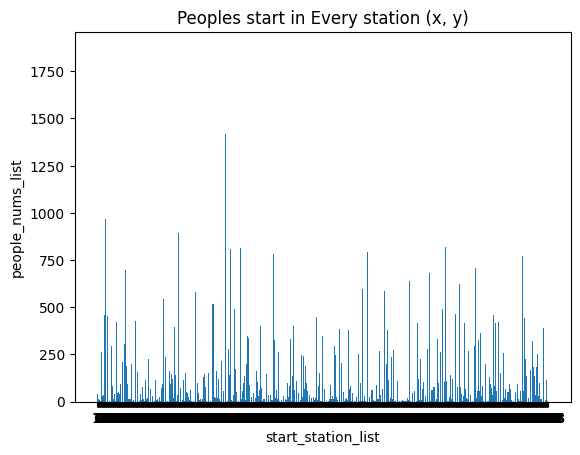

In [59]:
start_station_list = start_station_peoples['start_station'].values.tolist()[1:]
people_nums_list = start_station_peoples['nums'].values.tolist()[1:]
# 创建直方图
plt.bar(range(len(start_station_list)), people_nums_list)
# 设置横轴刻度标签为自定义的类别名称
plt.xticks(range(len(start_station_list)),start_station_list)
# 添加标题和标签
plt.title('Peoples start in Every station (x, y)')
plt.xlabel('start_station_list')
plt.ylabel('people_nums_list')
# 保存图形为SVG格式
plt.savefig('./figures/people_start_in_every_station_histogram.svg', format='svg')
# 显示图形
plt.show()
#一天之内乘坐公交车的次数分布如下所示：

In [60]:
start_people_nums_ndarray = np.array(start_station_peoples['nums'].values.tolist()[1:])
end_people_nums_ndarray = np.array(last_trip_peoples_distribution['nums'].values.tolist()[1:])
in_out_result = end_people_nums_ndarray-start_people_nums_ndarray
start_station_list = np.array(start_station_peoples['start_station'].values.tolist()[1:])
# 创建直方图
plt.bar(range(len(start_station_list)), in_out_result)
# 设置横轴刻度标签为自定义的类别名称
plt.xticks(range(len(start_station_list)),start_station_list)
# 添加标题和标签
plt.title('Peoples in_out in Every station (x, y)')
plt.xlabel('station_list')
plt.ylabel('in_out_people_nums')
# 保存图形为SVG格式
plt.savefig('./figures/people_in_out_in_every_station_histogram.svg', format='svg')
# 显示图形
plt.show()
#一天之内乘坐公交车的次数分布如下所示：

ValueError: operands could not be broadcast together with shapes (1074,) (1143,) 

# to do task

In [93]:
can_used_od_trips=[]
def find_leave_station(sorted_index_array:np.ndarray,specified_indices:list):
    # 找到指定索引组中在排序数组中的位置
    positions = [sorted_index_array.index(idx) for idx in specified_indices]
    return sorted_index_array[min(positions)]
for row_index in range(len(trip_great_than_2)):
    trip_list = trip_great_than_2[row_index:row_index+1]['trip'].values[0]
    sorted_trips_list = sorted(trip_list,key=lambda x:x[0],reverse=False)
    for trip_index in range(len(sorted_trips_list)-1):
        this_time,this_line,this_station_id = sorted_trips_list[trip_index]
        next_time,next_line,next_station_id = sorted_trips_list[trip_index+1]
        try:
            this_line_station_name = road_line_station_structure_setting[this_line]['stations'][this_station_id]
            this_line_station_id = station_2_id[this_line_station_name]
        
            all_possible_leave_stations = road_line_station_structure_setting[this_line]['all_stations']
            all_possible_leave_stations_index = [station_2_id[station] for station in all_possible_leave_stations]
        
            next_line_station_name = road_line_station_structure_setting[next_line]['stations'][next_station_id]
            next_line_station_id = station_2_id[next_line_station_name]
            distance_2_next_line_station_ndarray  = station_distance_rank_index_list[next_line_station_id]
            leave_station = find_leave_station(distance_2_next_line_station_ndarray.tolist(),all_possible_leave_stations_index)
            od_trip = (this_line_station_id,this_time,this_line,next_line_station_id)
            can_used_od_trips.append(od_trip)
        except:
            continue

In [103]:
#将可用的od对转化为dataframe：这样就可以使用dataframe进行聚类
#can_used_od_trips[0:5]
can_used_od_trips_dataframe = pd.DataFrame(columns=['start_station_id','time','line','end_station_id'])
for trip_index in range(len(can_used_od_trips)):
    start_station_id,time,line,end_station_id=can_used_od_trips[trip_index]
    can_used_od_trips_dataframe.loc[len(can_used_od_trips_dataframe)] = \
    {'start_station_id':start_station_id, \
                                         'time':time, \
                                         'line':line, \
                                         'end_station_id':end_station_id}

In [104]:
len(can_used_od_trips)
#一共有169099可以确定的od对数据

169099

In [107]:
can_used_od_trips_dataframe['hour']= \
can_used_od_trips_dataframe['time'].apply(lambda x:x.split(':')[0])
can_used_od_trips_dataframe['minu']= \
can_used_od_trips_dataframe['time'].apply(lambda x:x.split(':')[1])

In [105]:
can_used_od_trips_dataframe

,start_station_id,time,line,end_station_id
0,1435,16:55:43,46,1262
1,643,09:20:51,204,436
2,436,09:26:05,207,898
3,898,16:29:50,5,406
4,795,07:13:30,7,1416
...,...,...,...,...
169094,1155,15:07:03,229,1155
169095,1155,15:07:13,229,263
169096,263,16:00:55,12,263
169097,1234,13:16:22,60,419


In [124]:
can_used_od_trips_dataframe.to_json('./can_used_od_trips_dataframe.json', orient='records')

In [125]:
# 使用read_json()函数打开JSON文件
test_can_used_od_trips_dataframe = pd.read_json('./can_used_od_trips_dataframe.json', orient='records')

In [126]:
test_can_used_od_trips_dataframe

,start_station_id,time,line,end_station_id,hour,minu
0,1435,16:55:43,46,1262,16,55
1,643,09:20:51,204,436,9,20
2,436,09:26:05,207,898,9,26
3,898,16:29:50,5,406,16,29
4,795,07:13:30,7,1416,7,13
...,...,...,...,...,...,...
169094,1155,15:07:03,229,1155,15,7
169095,1155,15:07:13,229,263,15,7
169096,263,16:00:55,12,263,16,0
169097,1234,13:16:22,60,419,13,16


In [108]:
can_used_od_trips_dataframe

,start_station_id,time,line,end_station_id,hour,minu
0,1435,16:55:43,46,1262,16,55
1,643,09:20:51,204,436,09,20
2,436,09:26:05,207,898,09,26
3,898,16:29:50,5,406,16,29
4,795,07:13:30,7,1416,07,13
...,...,...,...,...,...,...
169094,1155,15:07:03,229,1155,15,07
169095,1155,15:07:13,229,263,15,07
169096,263,16:00:55,12,263,16,00
169097,1234,13:16:22,60,419,13,16


In [122]:
#'hour','minu','line','start_station_id','end_station_id','time'
#可以获取各个站点各个时刻的上车人数，不管是不是同一个线路
od_trips_groupby_id_hour = can_used_od_trips_dataframe.groupby(['start_station_id', \
                                                                'hour']).agg({'line':list, \
                                                                              'end_station_id':list, \
                                                                              'minu':list}).reset_index()
od_trips_groupby_id_hour[od_trips_groupby_id_hour['start_station_id']==0]

,start_station_id,hour,line,end_station_id,minu
0,0,06,"[226, 226]","[345, 1177]","[38, 38]"
1,0,07,"[226, 228]","[28, 345]","[19, 35]"
2,0,08,[226],[846],[58]
3,0,09,[228],[345],[35]
4,0,10,"[226, 228, 228, 228, 228, 228, 228]","[261, 0, 1070, 1218, 128, 0, 345]","[13, 35, 35, 34, 35, 34, 34]"
5,0,11,"[226, 226, 226]","[846, 846, 507]","[50, 50, 20]"
6,0,12,[228],[467],[35]
7,0,16,[226],[0],[45]
8,0,17,[228],[345],[45]
9,0,18,"[226, 226, 226]","[846, 846, 846]","[52, 51, 52]"


In [128]:
#将各个站点的各个图像画出来，
#选择人流量大的站点，看上车人数分布
od_trips_groupby_id_hour['nums'] = od_trips_groupby_id_hour['line'].apply(lambda x:len(x))
od_trips_groupby_id_hour

,start_station_id,hour,line,end_station_id,minu,nums
0,0,06,"[226, 226]","[345, 1177]","[38, 38]",2
1,0,07,"[226, 228]","[28, 345]","[19, 35]",2
2,0,08,[226],[846],[58],1
3,0,09,[228],[345],[35],1
4,0,10,"[226, 228, 228, 228, 228, 228, 228]","[261, 0, 1070, 1218, 128, 0, 345]","[13, 35, 35, 34, 35, 34, 34]",7
...,...,...,...,...,...,...
12189,1448,13,"[1027, 256, 1027, 1027, 232]","[1166, 774, 1251, 139, 122]","[35, 27, 35, 35, 21]",5
12190,1448,14,"[232, 1027, 256, 66]","[147, 1257, 610, 1143]","[01, 33, 19, 22]",4
12191,1448,15,"[66, 232, 66]","[263, 1177, 1357]","[13, 12, 13]",3
12192,1448,16,[1027],[43],[45],1


In [150]:
# 对DataFrame进行groupby并计算每个组的总和
grouped_sum = od_trips_groupby_id_hour.groupby('start_station_id')['nums'].transform('sum')
grouped_sum
# 计算每行的值占总和的比例
od_trips_groupby_id_hour['nums_proportion'] = od_trips_groupby_id_hour['nums'] / grouped_sum
od_trips_groupby_id_hour

,start_station_id,hour,line,end_station_id,minu,nums,nums_proportion
0,0,06,"[226, 226]","[345, 1177]","[38, 38]",2,0.090909
1,0,07,"[226, 228]","[28, 345]","[19, 35]",2,0.090909
2,0,08,[226],[846],[58],1,0.045455
3,0,09,[228],[345],[35],1,0.045455
4,0,10,"[226, 228, 228, 228, 228, 228, 228]","[261, 0, 1070, 1218, 128, 0, 345]","[13, 35, 35, 34, 35, 34, 34]",7,0.318182
...,...,...,...,...,...,...,...
12189,1448,13,"[1027, 256, 1027, 1027, 232]","[1166, 774, 1251, 139, 122]","[35, 27, 35, 35, 21]",5,0.106383
12190,1448,14,"[232, 1027, 256, 66]","[147, 1257, 610, 1143]","[01, 33, 19, 22]",4,0.085106
12191,1448,15,"[66, 232, 66]","[263, 1177, 1357]","[13, 12, 13]",3,0.063830
12192,1448,16,[1027],[43],[45],1,0.021277


In [133]:
od_trips_groupby_id_4_nums = od_trips_groupby_id_hour.groupby('start_station_id').agg({'nums':list}).reset_index()
od_trips_groupby_id_4_nums

,start_station_id,nums
0,0,"[2, 2, 1, 1, 7, 3, 1, 1, 1, 3]"
1,1,"[6, 7, 6, 6, 4, 1, 3, 3, 1, 1, 1]"
2,2,"[3, 8, 25, 28, 28, 8, 15, 20, 10, 20, 19, 7, 8..."
3,4,"[1, 5, 2, 1, 1, 1, 1, 1, 1]"
4,7,"[34, 32, 34, 54, 38, 23, 27, 34, 15, 11, 27, 1..."
...,...,...
1126,1441,"[1, 1, 1, 1, 1, 1]"
1127,1442,"[2, 1, 1]"
1128,1443,"[2, 13, 7, 3, 19, 11, 4, 4, 8, 7, 11, 12, 4, 1..."
1129,1444,[1]


In [143]:
od_trips_groupby_id_4_nums['sum'] = od_trips_groupby_id_4_nums['nums'].apply(lambda x:sum(x))
#od_trips_groupby_id_4_nums
station_id_2_swip_times = list(zip(od_trips_groupby_id_4_nums['start_station_id'], \
                                   od_trips_groupby_id_4_nums['sum']))
#station_id_2_swip_times
sorted_station_id_2_swip_times = sorted(station_id_2_swip_times,key=lambda x:x[1],reverse=True)
sorted_station_id_2_swip_times

[(261, 3544),
 (759, 2193),
 (1414, 1959),
 (406, 1886),
 (349, 1807),
 (404, 1800),
 (806, 1489),
 (633, 1440),
 (795, 1405),
 (767, 1396),
 (387, 1384),
 (263, 1367),
 (1067, 1358),
 (1052, 1263),
 (610, 1193),
 (1173, 1187),
 (711, 1175),
 (1409, 1165),
 (555, 1120),
 (987, 1118),
 (1155, 1113),
 (28, 1081),
 (1011, 1075),
 (1208, 1071),
 (122, 1056),
 (553, 1023),
 (983, 993),
 (1120, 992),
 (508, 967),
 (534, 949),
 (850, 944),
 (419, 942),
 (216, 918),
 (87, 902),
 (1314, 897),
 (184, 889),
 (761, 870),
 (1358, 841),
 (447, 840),
 (1257, 840),
 (424, 812),
 (1063, 777),
 (88, 748),
 (913, 733),
 (354, 725),
 (787, 715),
 (31, 708),
 (189, 703),
 (550, 691),
 (405, 681),
 (128, 678),
 (908, 675),
 (744, 671),
 (320, 662),
 (807, 655),
 (1207, 654),
 (1056, 647),
 (758, 640),
 (899, 639),
 (1268, 633),
 (1140, 628),
 (430, 625),
 (403, 608),
 (1163, 604),
 (692, 592),
 (682, 585),
 (235, 580),
 (1009, 579),
 (1108, 575),
 (1018, 563),
 (1061, 560),
 (833, 548),
 (431, 547),
 (374, 

In [151]:
od_trips_groupby_id_hour[od_trips_groupby_id_hour['start_station_id']==261]

,start_station_id,hour,line,end_station_id,minu,nums,nums_proportion
2185,261,06,"[230, 2, 77, 248, 311, 311, 10, 230, 248, 1, 2...","[1246, 406, 144, 1157, 929, 1427, 1052, 1246, ...","[55, 19, 26, 31, 52, 38, 56, 43, 31, 52, 49, 3...",39,0.011005
2186,261,07,"[320, 27, 22, 1, 218, 72, 248, 311, 316, 316, ...","[1180, 437, 516, 406, 261, 1363, 594, 1002, 26...","[49, 58, 12, 53, 10, 25, 33, 05, 55, 55, 22, 4...",178,0.050226
2187,261,08,"[316, 320, 316, 27, 314, 320, 1, 1, 72, 77, 31...","[301, 550, 127, 1155, 908, 261, 555, 711, 261,...","[45, 56, 52, 19, 22, 27, 54, 15, 41, 23, 36, 4...",304,0.085779
2188,261,09,"[314, 33, 1, 2, 12, 314, 1, 311, 33, 2, 314, 1...","[1173, 795, 406, 216, 263, 122, 553, 1237, 117...","[37, 09, 42, 12, 32, 56, 41, 26, 28, 33, 42, 0...",482,0.136005
2189,261,10,"[22, 2, 248, 314, 311, 1, 27, 12, 314, 10, 320...","[306, 1208, 216, 1173, 60, 987, 424, 1161, 30,...","[37, 57, 48, 12, 12, 28, 17, 16, 55, 04, 34, 5...",514,0.145034
2190,261,11,"[33, 320, 66, 2, 316, 248, 72, 311, 1, 72, 314...","[1155, 1067, 1430, 349, 374, 1155, 1314, 1141,...","[14, 09, 57, 29, 40, 14, 32, 03, 06, 05, 29, 5...",415,0.117099
2191,261,12,"[248, 10, 1, 316, 316, 248, 248, 27, 1, 314, 1...","[216, 555, 711, 261, 1415, 261, 1173, 31, 1208...","[10, 56, 23, 47, 47, 09, 48, 25, 16, 34, 26, 3...",289,0.081546
2192,261,13,"[2, 1, 16, 314, 1, 248, 230, 27, 16, 33, 72, 1...","[387, 806, 633, 208, 711, 261, 1408, 552, 527,...","[15, 19, 52, 55, 22, 26, 31, 12, 21, 42, 02, 1...",260,0.073363
2193,261,14,"[248, 2, 1, 33, 27, 12, 12, 22, 2, 51, 2, 2, 7...","[767, 216, 555, 1140, 1414, 1304, 527, 87, 349...","[57, 04, 41, 14, 06, 30, 16, 41, 34, 44, 05, 2...",242,0.068284
2194,261,15,"[314, 248, 12, 2, 320, 2, 33, 33, 1, 12, 1, 1,...","[28, 787, 359, 387, 765, 263, 768, 1143, 918, ...","[35, 59, 47, 43, 32, 42, 31, 31, 51, 19, 31, 3...",204,0.057562


# 各个站点的刷卡数量

In [170]:
#获取每个用户第一次出发的id。
#获取可以获得的部分od对
#从这些内容估计剩余部分的od对。
#如果只有这些od对，可以看出路网内各个站点的人口流入流出情况，比如说，当他的可知od对进行完以后，这个人抵达了哪里
#可以看出各个站点在最后一程之前，各个站点的结余情况。
def process(x):
        return station_2_id[road_line_station_structure_setting \
        [x['line_identity']]['stations'][x['station_identity']]]
    except:
        return -1

day_0929_dataframe['station_id'] =  \
day_0929_dataframe.apply(lambda x: process(x)\
,axis=1)

#每个站点的刷卡数量可以通过对
day_0929_dataframe
#每个站点的总刷卡数量统计
day_0929_dataframe_groupby_station_id = \
day_0929_dataframe. \
groupby('station_id'). \
agg({'custom_precise_time':list,'line_identity':list,'card_identity':list,'car_identity':list}).reset_index()
day_0929_dataframe_groupby_station_id
day_0929_dataframe_groupby_station_id['nums'] = \
day_0929_dataframe_groupby_station_id['card_identity'].apply(lambda x:len(x))
day_0929_dataframe_groupby_station_id
day_0929_all_stations_swip_times = list(zip(day_0929_dataframe_groupby_station_id['station_id'], \
         day_0929_dataframe_groupby_station_id['nums']))
day_0929_all_stations_swip_times
sorted_day_0929_all_stations_swip_times= sorted(day_0929_all_stations_swip_times,key=lambda x:x[1],reverse=True)
sorted_day_0929_all_stations_swip_times

[(-1, 38878),
 (261, 7817),
 (759, 4303),
 (349, 4245),
 (406, 4052),
 (1414, 3963),
 (404, 3883),
 (263, 3204),
 (387, 3055),
 (633, 2952),
 (806, 2849),
 (795, 2847),
 (1067, 2837),
 (767, 2822),
 (1208, 2618),
 (1155, 2510),
 (1011, 2485),
 (1173, 2484),
 (711, 2462),
 (1052, 2439),
 (987, 2415),
 (983, 2286),
 (610, 2268),
 (1120, 2199),
 (28, 2171),
 (534, 2158),
 (1409, 2136),
 (87, 2105),
 (555, 2059),
 (122, 2056),
 (216, 1943),
 (553, 1921),
 (1314, 1910),
 (1257, 1883),
 (1268, 1820),
 (447, 1808),
 (184, 1791),
 (508, 1782),
 (761, 1733),
 (850, 1705),
 (913, 1667),
 (1358, 1643),
 (430, 1596),
 (1063, 1596),
 (424, 1553),
 (758, 1503),
 (419, 1485),
 (807, 1445),
 (403, 1375),
 (550, 1368),
 (1392, 1356),
 (744, 1344),
 (1056, 1325),
 (354, 1319),
 (908, 1318),
 (88, 1299),
 (405, 1283),
 (866, 1283),
 (128, 1230),
 (31, 1225),
 (787, 1209),
 (516, 1191),
 (320, 1172),
 (1062, 1168),
 (189, 1167),
 (431, 1164),
 (1108, 1163),
 (899, 1162),
 (1009, 1153),
 (368, 1146),
 (116

In [199]:
swip_times_stations=[]
for i in range(1,5):
    temp={'station':id_2_station[str(sorted_day_0929_all_stations_swip_times[i][0])], \
          'nums':sorted_day_0929_all_stations_swip_times[i][1]}
    swip_times_stations.append(temp)
print(swip_times_stations)

[{'station': '北京西路口', 'nums': 7817}, {'station': '油榨街', 'nums': 4303}, {'station': '喷水池', 'nums': 4245}, {'station': '大西门', 'nums': 4052}]


# 构造地图

In [173]:
import folium
from folium.plugins import HeatMap

# 假设你有站点数据，每个站点包括经纬度和权重
site_data = [
    {'lat': 40.7128, 'lon': -74.0060, 'weight': 0.5},
    {'lat': 34.0522, 'lon': -118.2437, 'weight': 0.8},
    {'lat': 51.5074, 'lon': -0.1278, 'weight': 0.6}
]

# 创建地图对象
m = folium.Map(location=[site_data[0]['lat'], site_data[0]['lon']], zoom_start=5)

# 创建热力图，并添加到地图上
heat_data = [[site['lat'], site['lon'], site['weight']] for site in site_data]
HeatMap(heat_data).add_to(m)

# 保存地图为HTML文件
m.save('map.html')


'油榨街'

# other idea

In [120]:
#'hour','minu','line','start_station_id','end_station_id','time'
#可以获取各个线路各个时刻在各个站点的刷卡数量
od_trips_groupby_line_hour_id = can_used_od_trips_dataframe.groupby(['line','hour','start_station_id' \
                                                                ]).agg({\
                                                                              'end_station_id':list, \
                                                                              'minu':list}).reset_index()
od_trips_groupby_line_hour_id

,line,hour,start_station_id,end_station_id,minu
0,1,05,806,"[1409, 430]","[50, 53]"
1,1,06,128,"[1414, 349, 1392, 261, 555, 633, 261, 261, 909...","[14, 45, 36, 14, 14, 15, 56, 56, 14, 15, 56]"
2,1,06,216,"[555, 261, 431, 555]","[37, 37, 57, 37]"
3,1,06,261,"[555, 555, 555, 555, 555, 828]","[52, 52, 22, 21, 52, 43]"
4,1,06,263,"[261, 261, 261]","[19, 19, 49]"
...,...,...,...,...,...
37460,4005,16,1056,[1056],[27]
37461,4005,16,1057,[373],[59]
37462,4005,16,1389,"[1389, 765, 1389, 263]","[32, 33, 33, 33]"
37463,4600,07,985,"[28, 31]","[57, 57]"


# 10-01号的刷卡数据情况

In [31]:
day_1001_dataframe = card_info_dataframe[card_info_dataframe['custom_day']=='2023-10-01']
day_1001_dataframe

,card_identity,line_identity,car_identity,station_identity,custom_day,custom_precise_time
377164,0x0C6B84DFFBEB7E3112481AE23499566B,222,7703,1,2023-10-01,08:33:23
377165,0x13A08316FB35BC0DFE0A98D00604E7E7,6,7744,4,2023-10-01,17:51:06
377166,0x1A146FC5EC5C78862B9A10C3004FCC2C,3,7477,15,2023-10-01,15:10:36
377167,0x3DC18BE83960BE730FC7CDCB33E1F2F5,226,7053,1,2023-10-01,15:25:31
377168,0x47602A7B7A8F237606D283798F822EEC,219,7158,21,2023-10-01,14:51:54
...,...,...,...,...,...,...
724622,0x6B5CCBC949D06967421DDEFFA8682697,13,7618,22,2023-10-01,11:09:08
724623,0x7FF2BF197AE5BB5ECCBC9BC64FFEE659,7,5020,10,2023-10-01,15:34:58
724624,0x89C88A5125FCAC7607C396EDABD8FA50,320,4451,9,2023-10-01,10:13:20
724625,0xA159FB0957C071A17B4FC41C6F622556,61,3826,10,2023-10-01,17:22:23
